In [1]:
from torch import nn
from data.data import *
from models.AudioResnet import AudioResnet
from loss.FocalLoss import FocalLoss

augmentations = Compose([
    AddGaussianNoise(std=0.1),
    TimeMasking(max_mask_pct=0.1),
    FrequencyMasking(max_mask_pct=0.1),
])

class Config:
    # === General ===

    model_name = "ShortChunkCNN-50-LIBROSA-FOCAL"
    device = "cuda" if torch.cuda.is_available() else "cpu"
    dtype = torch.float32
    save_path = f"trained_models\\{model_name}\\"
    seed = 42

    # === Training ===
    num_classes = 50
    num_epochs = 100
    batch_size = 1
    max_batch_size = 48
    learning_rate = 1e-4
    min_learning_rate = 1e-4
    weight_decay = 1e-4

    warmup_threshold = 1.0 / 100.0
    step_coefficient = 20.0 / 100.0

    gamma = 2.0
    save_checkpoints = True

    # === Dataset ===
    transforms = None
    use_masks = True
    num_workers = 1
    prefetch_factor = 3
    val_split = 0.1
    shuffle = True
    pos_weight = (torch.ones(num_classes) * 8).to("cuda")
    criterion = FocalLoss(gamma=0.0, reduction='mean', pos_weight=pos_weight)

In [4]:
from data.procesing import ParseData
directory = "large-melspec-dataset-50-LIBROSA"
data_directory = "E:/mtg-jamendo/"

# ParseData("raw_30s_cleantags_125artists", f"{data_directory}", f"E:/SongsDataset/{directory}", features=96, chunks_per_batch=2048, chunk_size=256, songs_per_label=1200, labels_to_include=10, chunks_per_song=48, test_prob=0.1, convert=False)

#directory = "large-melspec-dataset-50-LIBROSA"

ParseData("raw_30s_cleantags_125artists", f"{data_directory}", f"E:/SongsDataset/{directory}", features=96, chunks_per_batch=2048, chunk_size=256, songs_per_label=350, labels_to_include=50, chunks_per_song=48, test_prob=0.1, convert=True)

Reading: 55215 tracks, 11217 albums, 3552 artists
There are 50 genres in this partition.
There are 15 moods/themes in this partition.
There are 20 instruments in this partition.


100%|██████████| 55215/55215 [2:10:21<00:00,  7.06it/s]   


Couldn't find 25 songs.


In [2]:
from torch.utils.data import DataLoader

large_directory = "large-melspec-dataset-50-LIBROSA"

train_dataset = StreamingSongDataset(f"E:\\SongsDataset\\{large_directory}\\train_set\\data", f"E:\\SongsDataset\\{large_directory}\\train_set\\genre_labels", transform=augmentations)
test_dataset = StreamingSongDataset(f"E:\\SongsDataset\\{large_directory}\\test_set\\data", f"E:\\SongsDataset\\{large_directory}\\test_set\\genre_labels", transform=augmentations)

train_dataloader = DataLoader(
    train_dataset,
    batch_size=Config.batch_size,
    shuffle=True,
    num_workers=Config.num_workers,
    prefetch_factor=Config.prefetch_factor,
)

test_dataloader = DataLoader(
    test_dataset,
    batch_size=Config.batch_size,
    shuffle=True,
    num_workers=Config.num_workers,
    prefetch_factor=Config.prefetch_factor,
)

In [3]:
from models.ShortChunkCNN import ShortChunkCNN
from utils import misc

model = ShortChunkCNN(n_channels=128, n_class=50)
print(f"{misc.model_size(model)} Parameters")

3687346 Parameters


  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

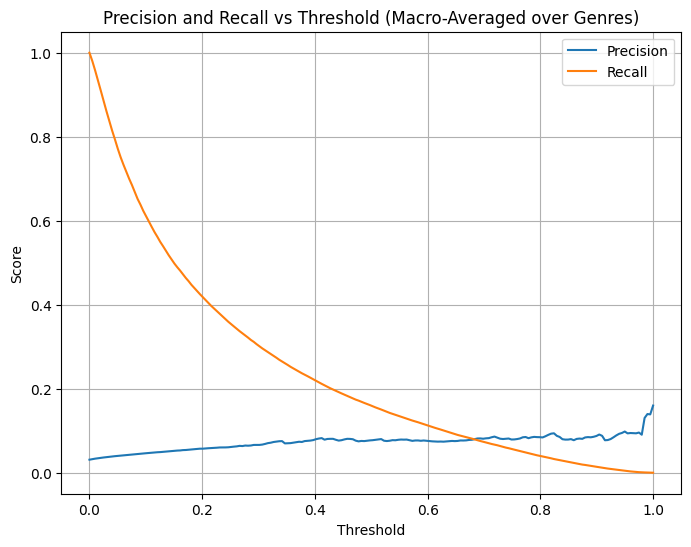

ROC-AUC: 0.6494	PR-AUC: 0.0687
Epoch 1, Train Loss: 0.4340
Epoch 1, Test Loss: 0.6228


  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

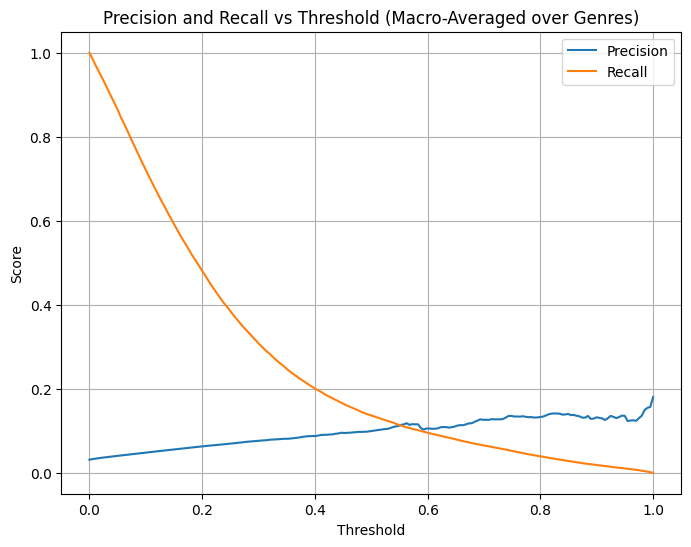

ROC-AUC: 0.6734	PR-AUC: 0.0790
Epoch 2, Train Loss: 0.3847
Epoch 2, Test Loss: 0.5540


  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

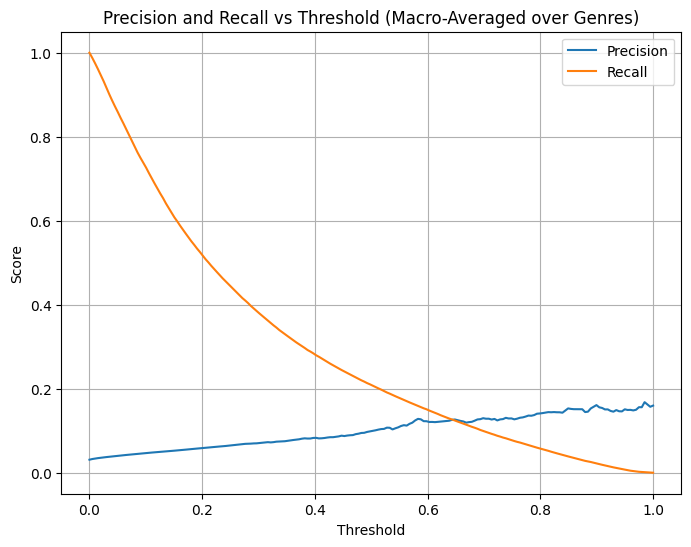

ROC-AUC: 0.6825	PR-AUC: 0.0828
Epoch 3, Train Loss: 0.3611
Epoch 3, Test Loss: 0.5300


  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

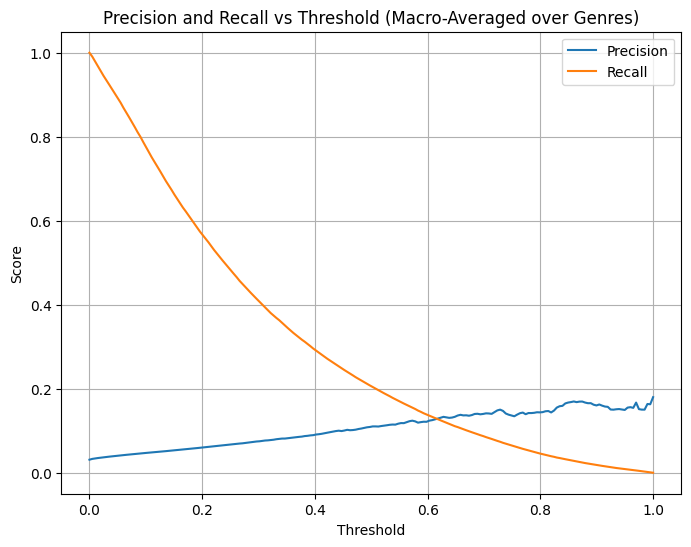

ROC-AUC: 0.6888	PR-AUC: 0.0896
Epoch 4, Train Loss: 0.3352
Epoch 4, Test Loss: 0.4812


  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

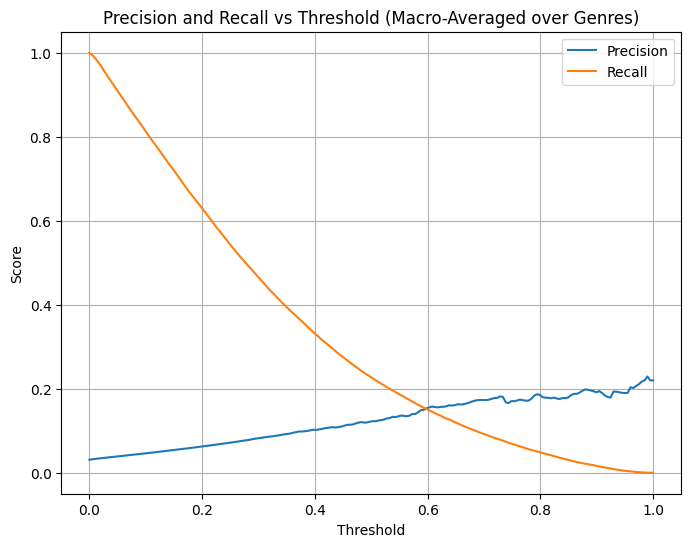

ROC-AUC: 0.7096	PR-AUC: 0.0961
Epoch 5, Train Loss: 0.3080
Epoch 5, Test Loss: 0.4379


  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

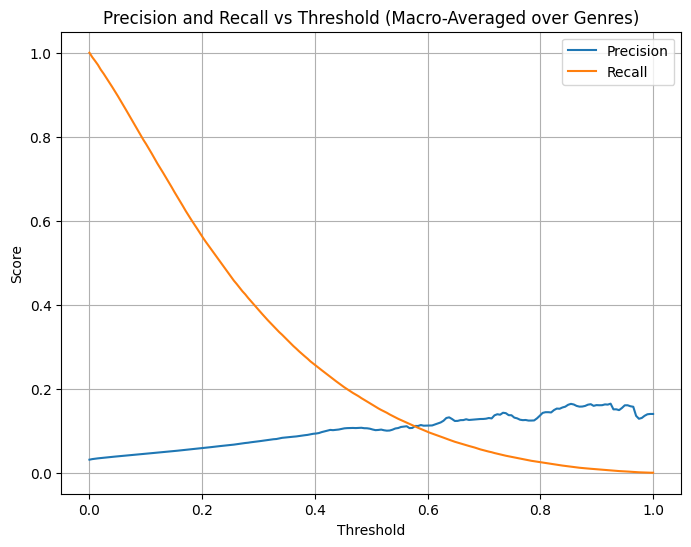

ROC-AUC: 0.6849	PR-AUC: 0.0805
Epoch 6, Train Loss: 0.2816
Epoch 6, Test Loss: 0.4484


  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

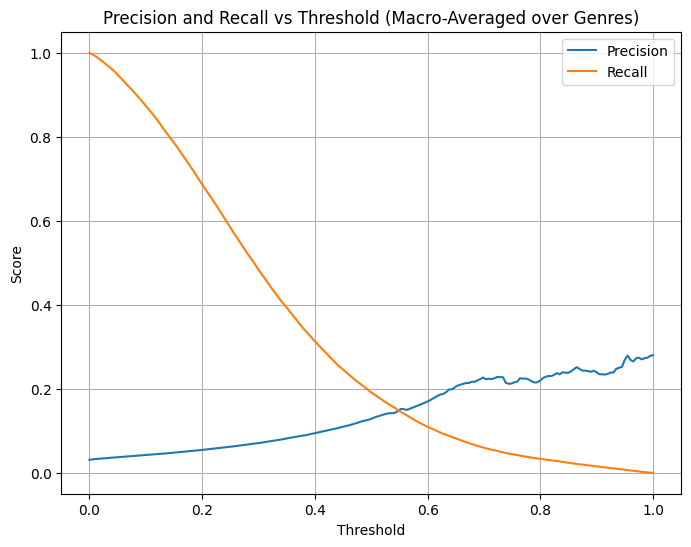

ROC-AUC: 0.7100	PR-AUC: 0.0980
Epoch 7, Train Loss: 0.2657
Epoch 7, Test Loss: 0.3821


  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

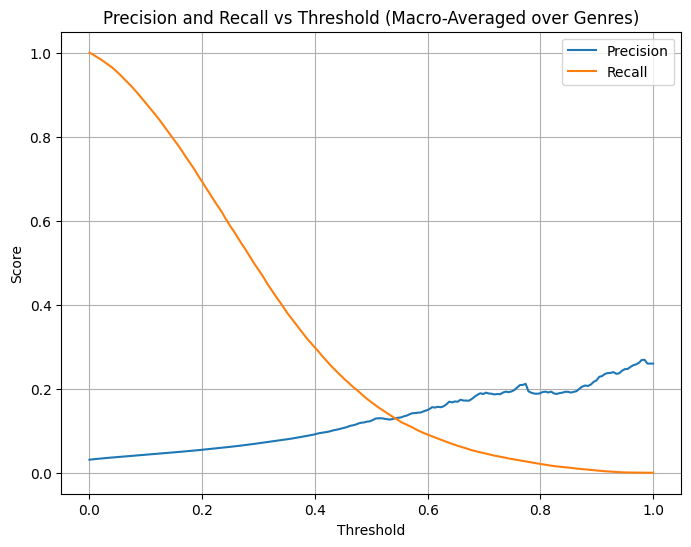

ROC-AUC: 0.7109	PR-AUC: 0.0916
Epoch 8, Train Loss: 0.2432
Epoch 8, Test Loss: 0.3652


  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

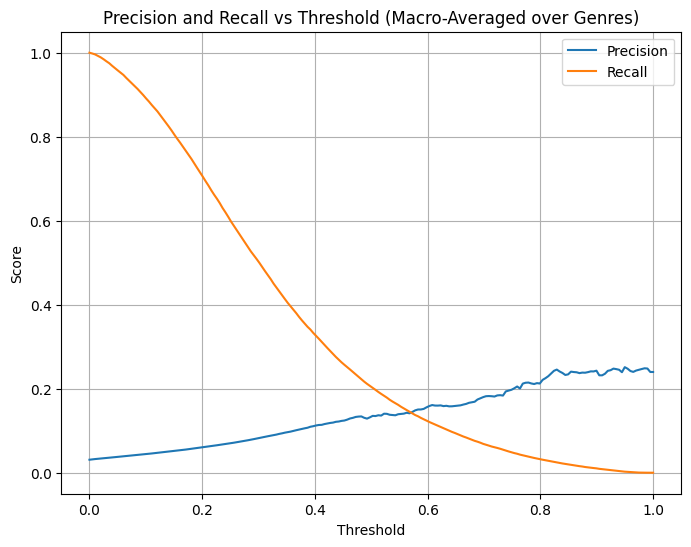

ROC-AUC: 0.7345	PR-AUC: 0.1105
Epoch 9, Train Loss: 0.2287
Epoch 9, Test Loss: 0.3358


  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

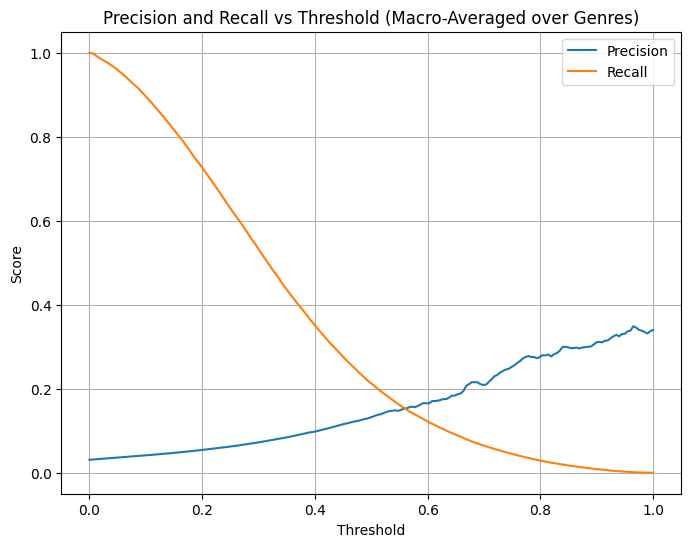

ROC-AUC: 0.7288	PR-AUC: 0.1155
Epoch 10, Train Loss: 0.2123
Epoch 10, Test Loss: 0.3065


  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

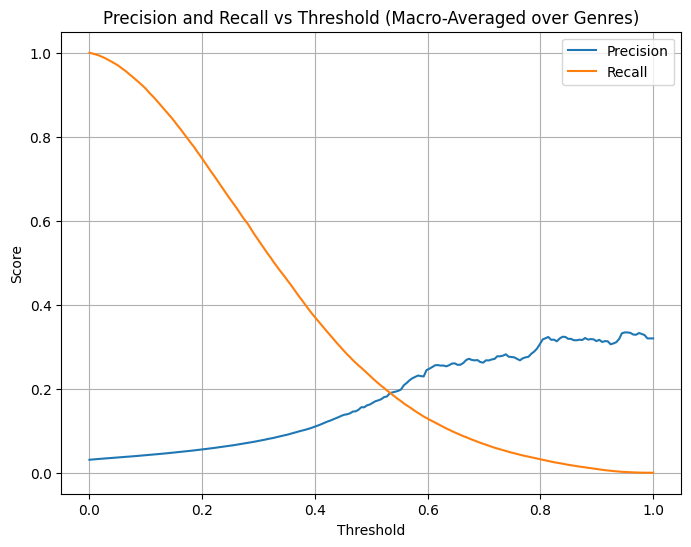

ROC-AUC: 0.7454	PR-AUC: 0.1239
Epoch 11, Train Loss: 0.1961
Epoch 11, Test Loss: 0.2832


  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

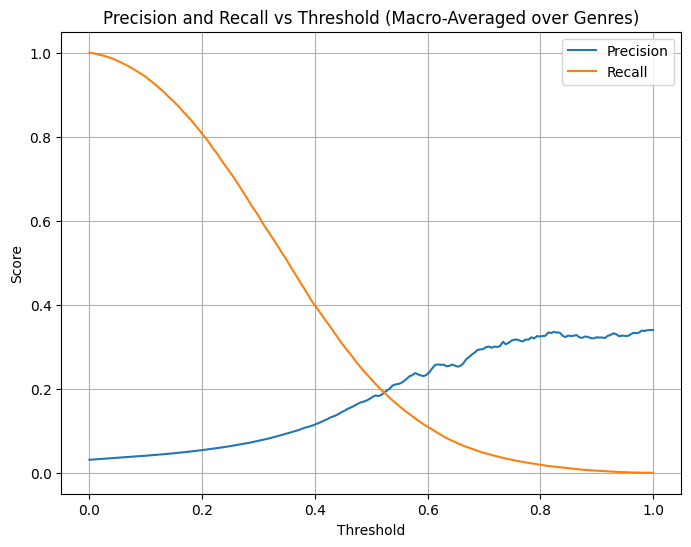

ROC-AUC: 0.7468	PR-AUC: 0.1206
Epoch 12, Train Loss: 0.1812
Epoch 12, Test Loss: 0.2705


  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

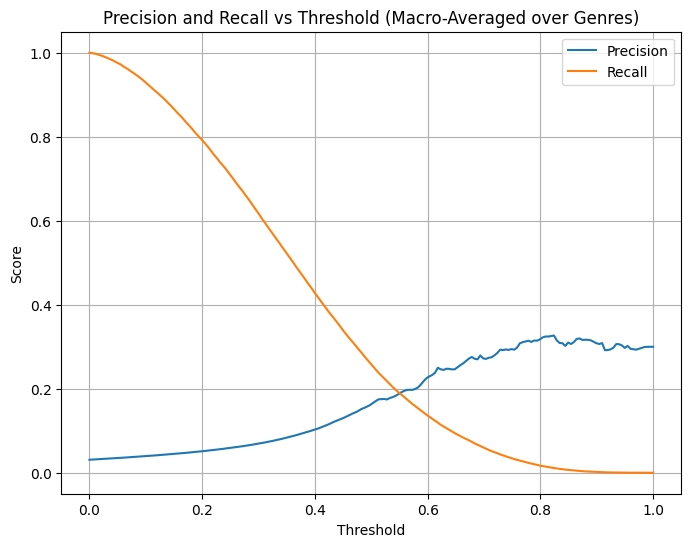

ROC-AUC: 0.7370	PR-AUC: 0.1244
Epoch 13, Train Loss: 0.1692
Epoch 13, Test Loss: 0.2498


  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

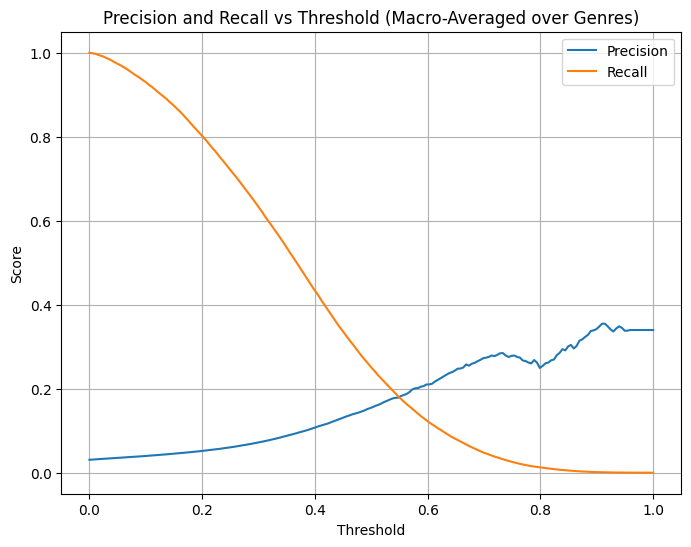

ROC-AUC: 0.7455	PR-AUC: 0.1254
Epoch 14, Train Loss: 0.1552
Epoch 14, Test Loss: 0.2349


  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

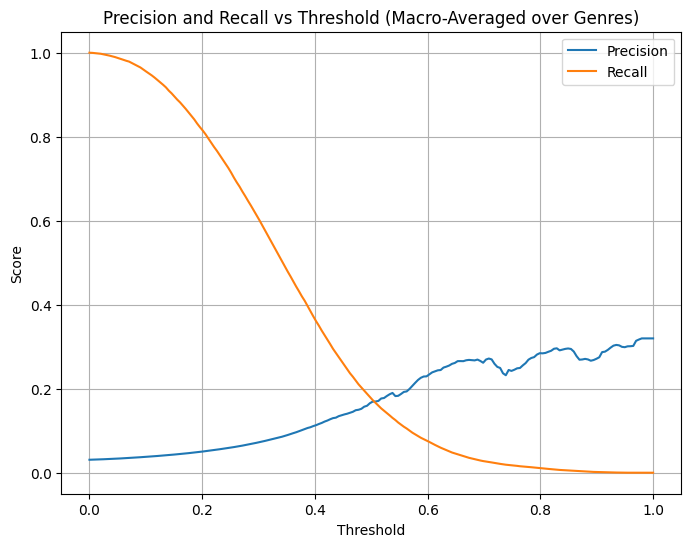

ROC-AUC: 0.7334	PR-AUC: 0.1190
Epoch 15, Train Loss: 0.1441
Epoch 15, Test Loss: 0.2344


  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

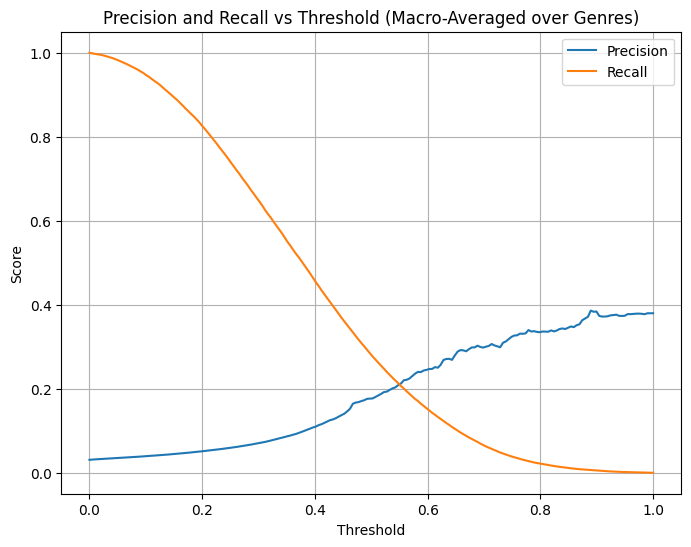

ROC-AUC: 0.7549	PR-AUC: 0.1394
Epoch 16, Train Loss: 0.1346
Epoch 16, Test Loss: 0.2105


  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

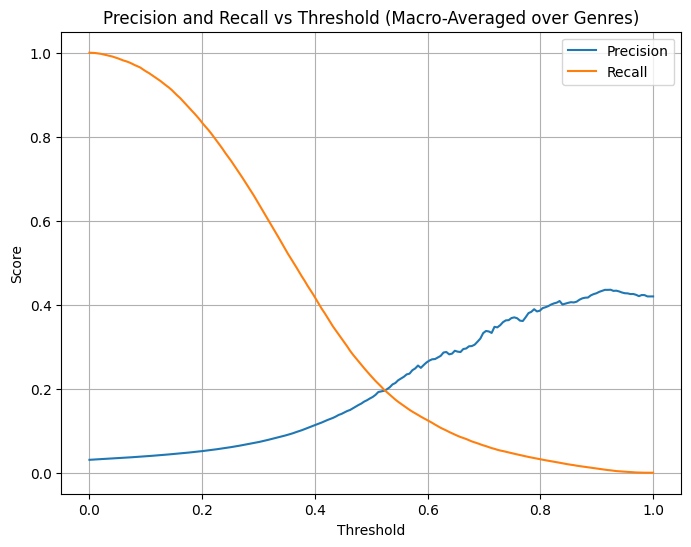

ROC-AUC: 0.7557	PR-AUC: 0.1445
Epoch 17, Train Loss: 0.1252
Epoch 17, Test Loss: 0.1969


  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

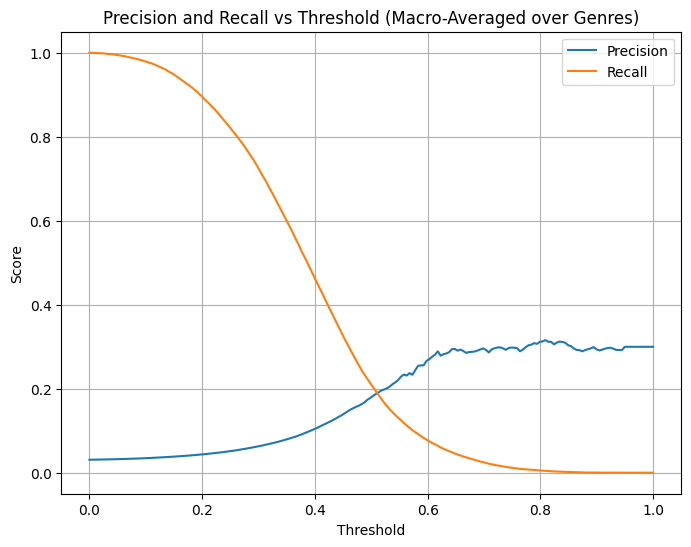

ROC-AUC: 0.7418	PR-AUC: 0.1253
Epoch 18, Train Loss: 0.1137
Epoch 18, Test Loss: 0.1767


  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

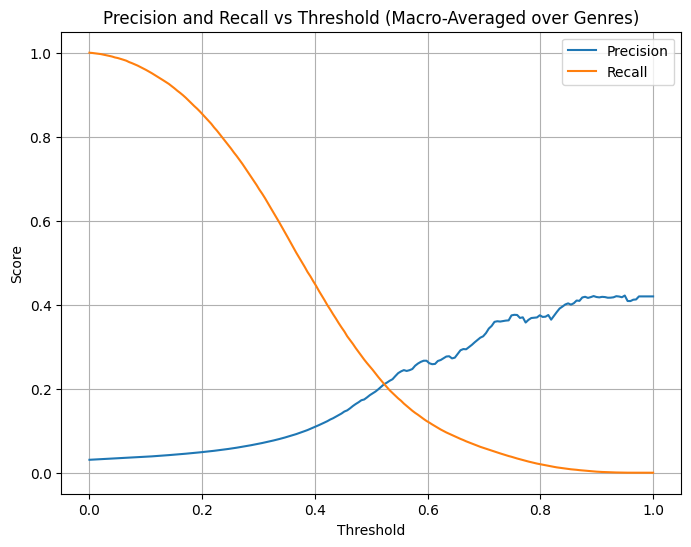

ROC-AUC: 0.7597	PR-AUC: 0.1475
Epoch 19, Train Loss: 0.1061
Epoch 19, Test Loss: 0.1733


  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

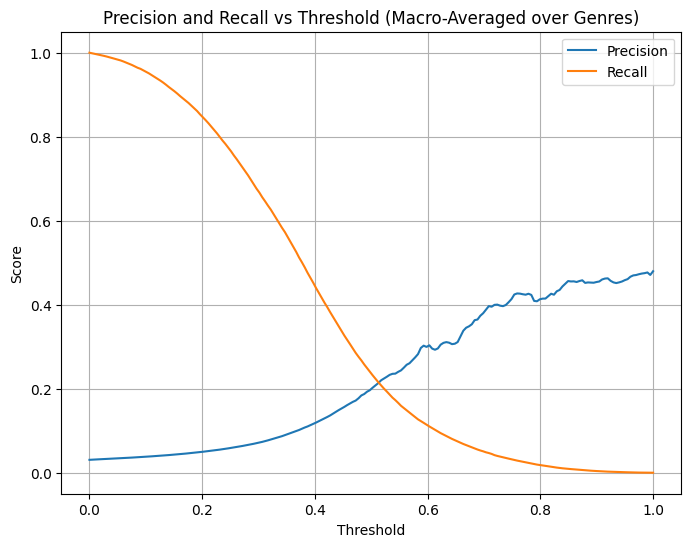

ROC-AUC: 0.7652	PR-AUC: 0.1530
Epoch 20, Train Loss: 0.0976
Epoch 20, Test Loss: 0.1724


  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

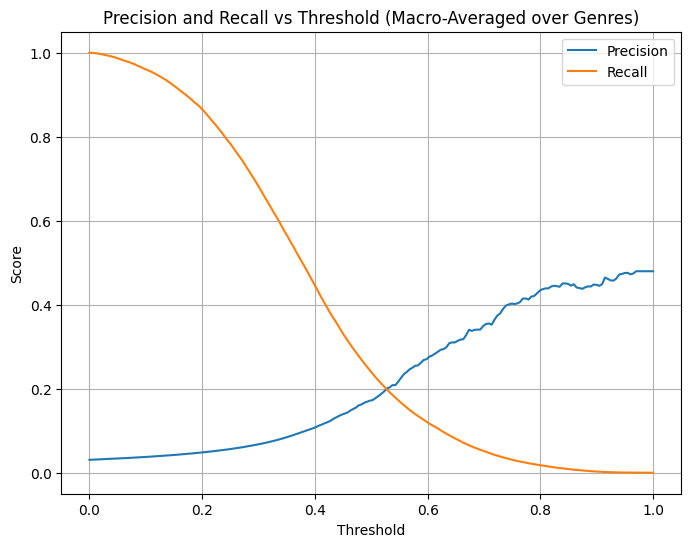

ROC-AUC: 0.7555	PR-AUC: 0.1332
Epoch 21, Train Loss: 0.0938
Epoch 21, Test Loss: 0.1721


  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

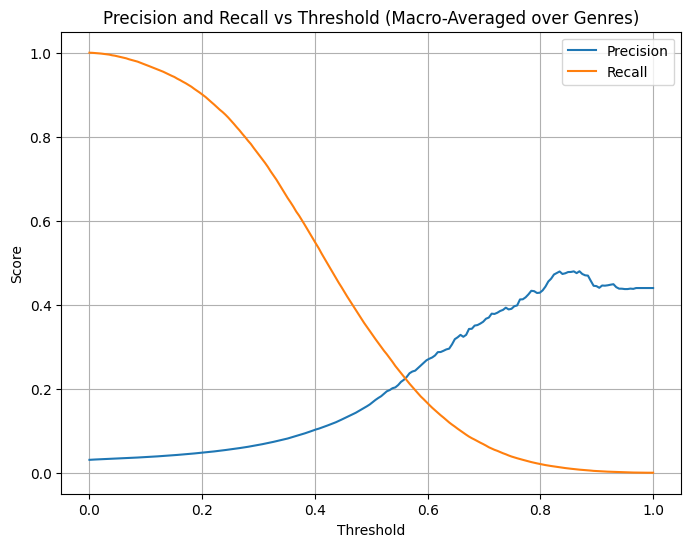

ROC-AUC: 0.7870	PR-AUC: 0.1686
Epoch 22, Train Loss: 0.0923
Epoch 22, Test Loss: 0.1493


  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

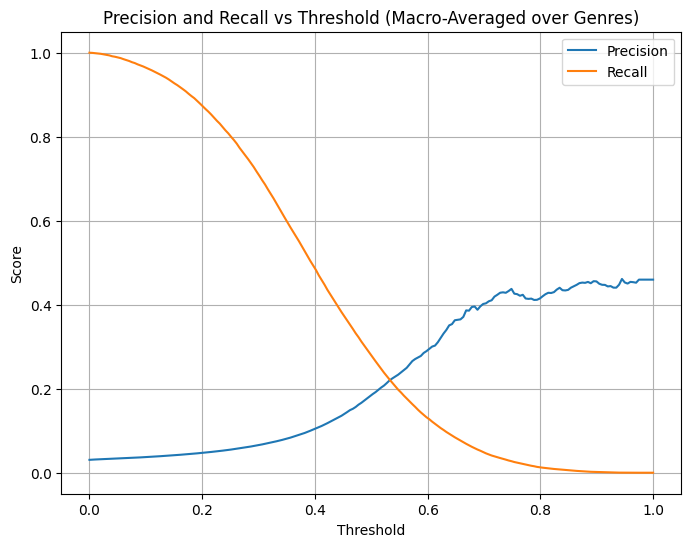

ROC-AUC: 0.7616	PR-AUC: 0.1542
Epoch 23, Train Loss: 0.0910
Epoch 23, Test Loss: 0.1616


  0%|          | 0/80 [00:00<?, ?it/s]

In [ ]:
from training.classification_training import train_classifier
train_classifier(model, test_dataloader, train_dataloader, Config, show_graph=True)

In [ ]:
from training.classification_training import train_classifier
train_classifier(model, test_dataloader, train_dataloader, Config, show_graph=True)

In [ ]:
import torch.nn as nn
from training.classification_training import train_classifier, evaluate_classification

criterion = nn.BCEWithLogitsLoss(pos_weight=Config.pos_weights)
train_classifier(model, test_dataloader, train_dataloader, Config, show_graph=True)

In [11]:
#from loss.loss_utils import DifferentiablePRAUCLoss
from training.classification_training import train_classifier, evaluate_classification

model = torch.load("E:/Coding/SongAnalyzer/Analyzer/src/trained_models/ShortChunkCNN-10-LIBROSA/Classifier-Epoch-30.pt", weights_only=False)

test_loss_average, all_probs, all_labels = evaluate_classification(model, test_dataloader, Config)

all_p_tensor = torch.stack([torch.tensor(x) for x in all_probs], dim=0).float()
all_l_tensor = torch.stack([torch.tensor(x) for x in all_labels], dim=0).int()

  0%|          | 0/33 [00:00<?, ?it/s]

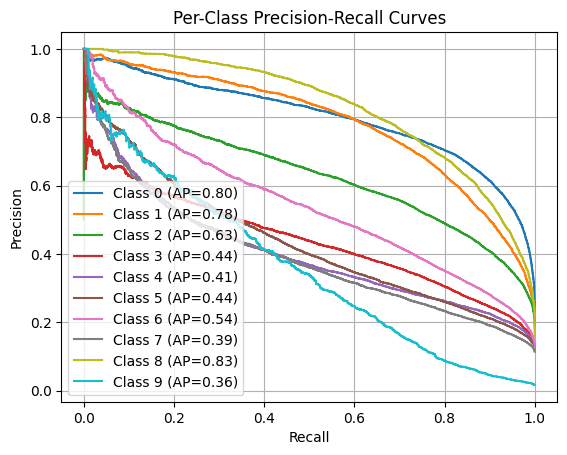

AP per class: [0.7997202241585106, 0.7821739736834521, 0.6301945823630619, 0.4391855265459404, 0.4054277981759145, 0.4364071508496885, 0.5415332415538002, 0.3946279623840431, 0.8260041688533464, 0.3618580327958464]


In [13]:
from matplotlib import pyplot as plt
from sklearn.metrics import average_precision_score, precision_recall_curve

for i in range(10):
    precision, recall, thresholds = precision_recall_curve(all_l_tensor[:, i], all_p_tensor[:, i])
    ap = average_precision_score(all_l_tensor[:, i], all_p_tensor[:, i])
    plt.plot(recall, precision, label=f"Class {i} (AP={ap:.2f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.title("Per-Class Precision-Recall Curves")
plt.grid(True)
plt.show()

ap_per_class = [average_precision_score(all_l_tensor[:, i], all_p_tensor[:, i]) for i in range(10)]
print("AP per class:", ap_per_class)

In [ ]:
weights = model.stack1a.conv1.modules()
c = [x for x in weights][1]
show_weights(c.weight.data.cpu())

In [ ]:
from torchcam.methods import GradCAM
cam_extractor = GradCAM(model, target_layer="layer4")

In [ ]:
def toMEL(wv, sr):
    spec = librosa.feature.melspectrogram(y=wv, sr=sr)
    spec = librosa.amplitude_to_db(spec, ref=np.max)
    return spec

def process_song(song_path, folder_in, folder_out, transform):
    latents_path_name = os.path.join(folder_out, song_path[:-4] + ".npy")

    if os.path.exists(latents_path_name):
        return

    try:
        wv, sr = librosa.load(os.path.join(folder_in, song_path), sr=44100)
        latent_space = transform(wv, sr)
        np.save(latents_path_name, latent_space)
    except Exception as e:
        print(f"Error processing {song_path}: {e}")

def encodeFolder(folder_in, folder_out, transform, num_threads=8):
    os.makedirs(folder_out, exist_ok=True)
    song_paths = os.listdir(folder_in)

    with ThreadPoolExecutor(max_workers=num_threads) as executor:
        futures = [
            executor.submit(process_song, song_path, folder_in, folder_out, transform)
            for song_path in song_paths
        ]
        for _ in tqdm(as_completed(futures), total=len(futures), desc=f"Processing {folder_in}"):
            pass

# Run for folders 50 to 98
for index in range(0, 99):
    folder_name = f"E:/mtg-jamendo/{index:02}"
    encodeFolder(folder_name, "E:/SongsDataset/MELSPEC/", toMEL)